<a href="https://colab.research.google.com/github/sheli90610/NumPy/blob/master/Copy_of_Unit_4_ML_KNN_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN algorithm

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the   predicted response value for the unknown value.
hOW KNN works?
How we will classify an unknown fruit classifyes as a specific fruit?
We will compare its characteristic with 



# KNN classifier

### Suppose we’ve been given a classified data set from a company! They’ve hidden the feature column names but have given you the data and the target classes. We’ll try to use KNN to create a model that directly predicts a class for a new data point based off of the features. Let’s grab it and use it.
## Machine learning terminology
- Each row is an **observation** (also known as: sample, example, instance, record) we will designate it with  y
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate) we will designate it as an X ,capital X (designating matrix)

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

read the data set or load it if it is encapsulated in SIlearn 
df = pd.read_csv('https...') or
import load_iris function from datasets module
scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.some of them are:
load_boston()	Load and return the boston house-prices dataset (regression).
load_iris()	Load and return the iris dataset (classification).
load_diabetes()	Load and return the diabetes dataset (regression).

Example of 21 Pandas operations on data files 

https://towardsdatascience.com/21-pandas-operations-for-absolute-beginners-5653e54f4cda

In [131]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [41]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [73]:
# printing colums ,we noticed we have empty 'Unnamed: 0' columns,we will drop it 
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [74]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)  
#inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated.
#When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.

In [223]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [32]:
type(df)

pandas.core.frame.DataFrame

In [133]:
ad_data = df

In [134]:
print (ad_data) 

     Unnamed: 0       WTT       PTI  ...       HQE       NXJ  TARGET CLASS
0             0  0.913917  1.162073  ...  0.879422  1.231409             1
1             1  0.635632  1.003722  ...  0.621552  1.492702             0
2             2  0.721360  1.201493  ...  0.957877  1.285597             0
3             3  1.234204  1.386726  ...  1.522692  1.153093             1
4             4  1.279491  0.949750  ...  1.463812  1.419167             1
..          ...       ...       ...  ...       ...       ...           ...
995         995  1.010953  1.034006  ...  1.117340  1.348517             1
996         996  0.575529  0.955786  ...  0.958684  1.663489             0
997         997  1.135470  0.982462  ...  0.919191  1.385504             1
998         998  1.084894  0.861769  ...  1.277456  1.188063             1
999         999  0.837460  0.961184  ...  1.257190  1.364837             1

[1000 rows x 12 columns]


In [13]:
# Ploting few of data features we see how the data in not standart  
from sklearn.preprocessing import StandardScaler
# StandardScaler It basically helps to normalise the data within a particular range (to be around mean=0,std=1). 
# Sometimes, it also helps in speeding up the calculations in an algorithm.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

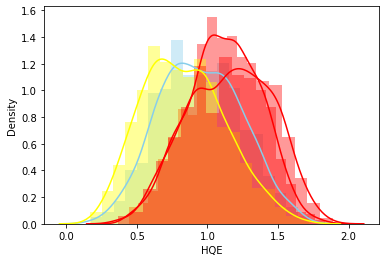

In [188]:

sns.distplot( ad_data["WTT"] , color="skyblue")
sns.distplot( ad_data["PTI"] , color="red")
sns.distplot( ad_data["EQW"] , color="yellow")
sns.distplot( ad_data["HQE"] , color="red")



#Standardization and Normalization of data

https://benalexkeen.com/feature-scaling-with-scikit-learn/

 Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization or standardization. 

There are 4 types of scaling in sicikit

 StandardScaler, MinMaxScaler, RobustScaler, Normalizer
Two most common used is Normalization (help to scale your features 0 to 1 ) and (standarization , Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1) 

we are standardizing the data now   


 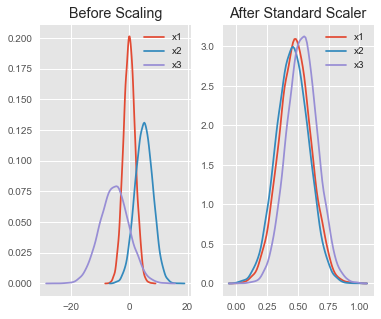


In [135]:
# Using StandardScaler library
from sklearn.preprocessing import StandardScaler

In [136]:
# define scaler
scalar = StandardScaler()

In [160]:
#fit() calculates the parameters (𝜇,std,var) when StandardScaler used

scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [138]:
# transform data
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))


In [139]:
# apply dataframe on all columns of scaled data
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [140]:
X = df.drop('TARGET CLASS',axis=1).values


In [168]:
df_feature.drop(['Unnamed: 0'], axis=1, inplace=True)
# we can see now the scaled values
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

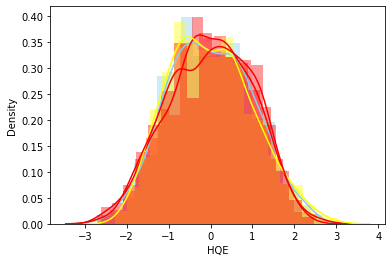

In [142]:
# after scaling let's compare the columns 
sns.distplot( df_feature["WTT"] , color="skyblue")
sns.distplot( df_feature["PTI"] , color="red")
sns.distplot( df_feature["EQW"] , color="yellow")
sns.distplot( df_feature["HQE"] , color="red")


## scikit-learn 4-step modeling pattern


Step 1 train and test your model
Import the library


With sklearn.model_selection.train_test_split you are creating 4 portions of data which will be used for fitting & predicting values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42) 

X_train, X_test, y_train, y_test
Now

1). X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.4, this means 60% of observations from your complete data will be used to train/fit the model and rest 40% will be used to test the model.

2). X_test - This is remaining 40% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

3). y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

4). y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

Now you can fit a model on this data, let's fit sklearn.linear_model.LogisticRegression



In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test  = train_test_split(scaled_features, df['TARGET CLASS'], test_size =0.3)

In [171]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)

print ("y_test: ", y_test)

X_train:  [[-0.93011175 -0.80313061  1.29908884 ... -0.46640223 -1.09633054
   1.45013532]
 [-1.35273236 -1.99586183 -0.03373907 ... -0.28414032  0.71189552
  -0.48417334]
 [ 0.08487053 -1.13731253  0.55876202 ...  1.10973976  0.4623948
   0.38325256]
 ...
 [ 1.53286573 -0.80452931  1.44088287 ... -0.86563737 -1.7468895
  -0.97436406]
 [ 1.36658877 -2.10759126 -0.43813561 ...  1.66969315 -0.64865796
  -1.12739663]
 [ 0.70494503  1.74176232 -1.54491053 ... -0.90992029  1.69305372
  -0.18165043]]
y_train:  231    0
109    0
524    0
248    1
719    1
      ..
41     0
864    1
942    0
894    0
703    1
Name: TARGET CLASS, Length: 700, dtype: int64
y_test:  417    0
781    1
31     1
462    0
170    1
      ..
55     0
742    0
807    0
169    1
80     0
Name: TARGET CLASS, Length: 300, dtype: int64


Name of the object does not matter
Can specify tuning parameters (aka "hyperparameters") during this step
All parameters not specified are set to their defaults

In [172]:
from sklearn.neighbors import  KNeighborsClassifier

In [173]:
knn = KNeighborsClassifier(n_neighbors=5)

In [174]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [175]:
predict = knn.predict(X_test)

In [176]:
predict

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [177]:
from sklearn.metrics import  classification_report, confusion_matrix

In [178]:
print(confusion_matrix(y_test,predict))

[[143  17]
 [  6 134]]


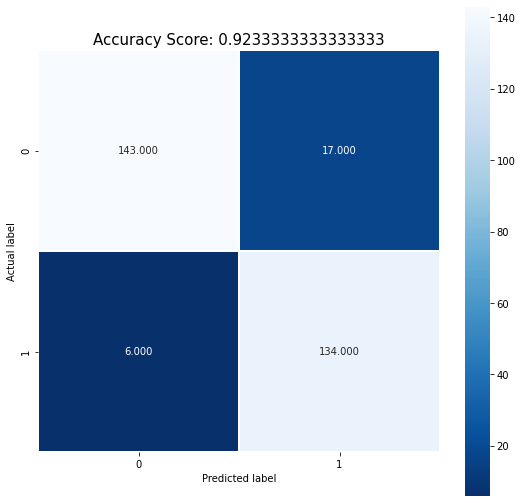

In [179]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [180]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       160
           1       0.89      0.96      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



# Repeat above steps for K = 5, see what happens with Accuracy

# K Value and Accuracy

In [ ]:
import numpy as np

In [ ]:
from sklearn import metrics

In [ ]:
score =[]

In [ ]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.9333333333333333, 0.9266666666666666, 0.9366666666666666, 0.9333333333333333, 0.9366666666666666, 0.9433333333333334, 0.94, 0.9433333333333334, 0.9533333333333334, 0.95, 0.94, 0.9433333333333334, 0.94, 0.94, 0.9366666666666666, 0.94, 0.94, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9433333333333334, 0.9466666666666667, 0.95, 0.9466666666666667, 0.95, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.95, 0.9533333333333334, 0.95, 0.95, 0.95, 0.9566666666666667, 0.9466666666666667, 0.95, 0.95]


Text(0, 0.5, 'Testing Accuracy')

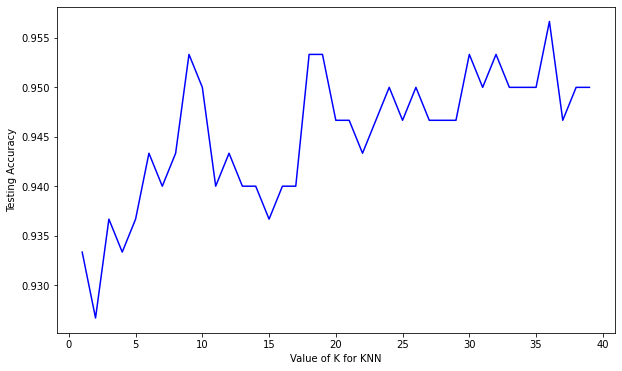

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),score, color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#Error Rate and K value

In [ ]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

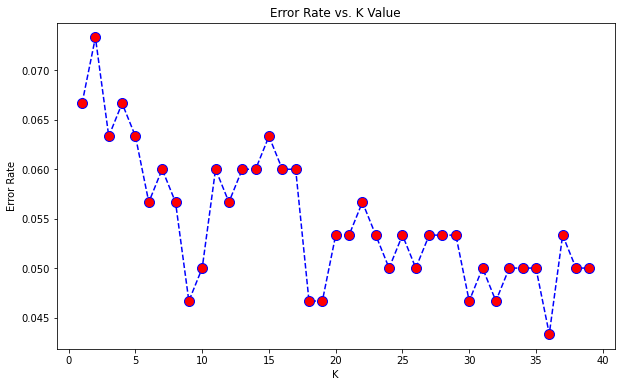

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Conclusion